# Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
#from sklearn.datasets.samples_generator import make_blobs

# Import code

In [2]:
# Load dataset module and look at what's contained inside.
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# Grab just the data and columns
# Stack overflow source: https://stackoverflow.com/questions/44340445/loading-sklearn-cancer-dataset-into-pandas-dataframe
cancer_df = pd.DataFrame(np.c_[cancer['target'], cancer['data']], columns=np.append(['target'], cancer['feature_names']))

In [4]:
cancer_df.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory visualizations

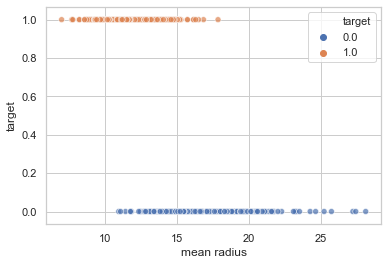

In [5]:
# Visualize dataset in two dimensions using a scatter plot
sns.scatterplot(x='mean radius', y='target', data=cancer_df,alpha=0.7,hue=cancer_df['target']);

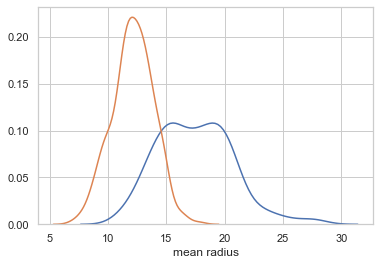

In [6]:
# Visualize dataset in two dimensions using a scatter plot
# More advanced, for many categories
cancerous = cancer_df['mean radius'].loc[cancer_df['target'] == 1]
noncancerous = cancer_df['mean radius'].loc[cancer_df['target'] == 0]
sns.distplot(noncancerous, hist = False, kde = True);
sns.distplot(cancerous, hist = False, kde = True)


# K-means clustering

In [7]:
# Break the dataset out into the features and labels
cancer_features = cancer_df.loc[:, 'mean radius':]
cancer_labels = cancer_df[['target']]

In [8]:
cancer_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


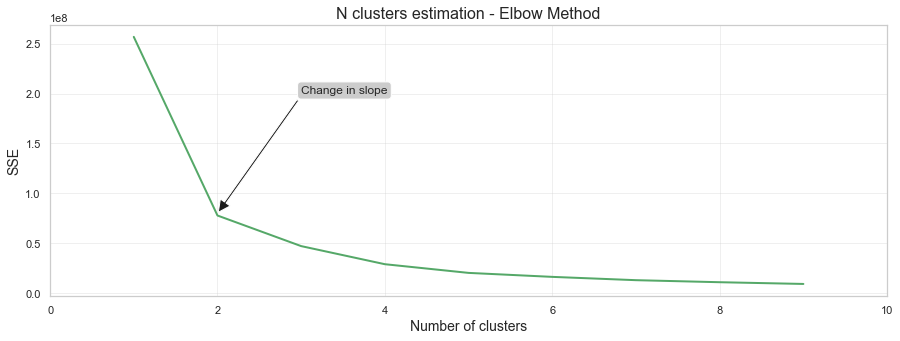

In [10]:
sse = {}
data = cancer_features.copy()
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(list(sse.keys()), list(sse.values()), lw=2, c='g')
ax.set_xlabel("Number of clusters", fontsize=14)
ax.set_ylabel("SSE", fontsize=14)
ax.set_title('N clusters estimation - Elbow Method', fontsize=16)
ax.grid(alpha=0.3)
ax.set_xlim(0,10)


label_x = 3
label_y = 2*10**8
arrow_x = 2
arrow_y = 0.8*10**8

arrow_properties = dict(facecolor='k', shrink=0.01,width=2)
bbox = dict(boxstyle='round', fc='0.8')
ax.annotate('Change in slope', xy=(arrow_x, arrow_y), xytext=(label_x, label_y), arrowprops=arrow_properties, bbox=bbox, fontsize=12)

plt.show()

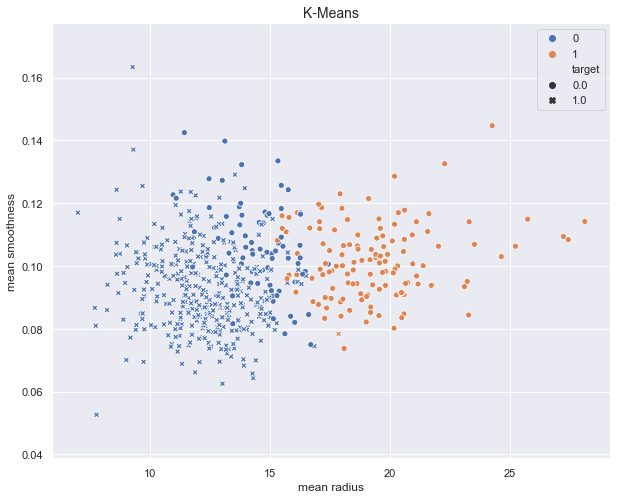

In [71]:
# Define k-means parameters and cluster
clusters = KMeans(n_clusters=2).fit_predict(cancer_features)
fig, ax = plt.subplots(figsize=(10,8))
scatter = sns.scatterplot(cancer_features['mean radius'], cancer_features['mean smoothness'], hue=clusters, style=cancer_labels['target']);
ax.set_title('K-Means', fontsize=14);

# Expectation-maximization clustering

In [13]:
from matplotlib.patches import Ellipse

In [186]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
        
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        

In [187]:
def plot_gmm(gmm, X, label=True, ax=None):
    """Plot Gaussian Mixture Model
    """
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, vmin=0, vmax=.2)            

    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, vmin=0, vmax=.2)
        
    w_factor = 0.3 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

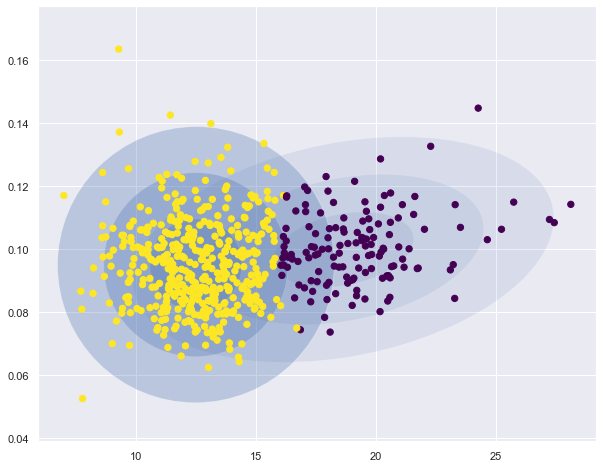

In [189]:
# EM clustering
gmm = GaussianMixture(n_components=2, covariance_type='full')
x = cancer_features[['mean radius', 'mean smoothness']]
gmm.fit(x)

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_gmm(gmm, np.array(x), label=True, ax= ax)

In [190]:
gmm.means_

array([[18.63846915,  0.0998775 ],
       [12.48449697,  0.09507945]])

In [191]:
gmm.covariances_

array([[[8.52885853e+00, 9.70946091e-03],
        [9.70946091e-03, 1.41881725e-04]],

       [[3.69604280e+00, 9.49462961e-05],
        [9.49462961e-05, 2.12907269e-04]]])

(100,)
(100,)


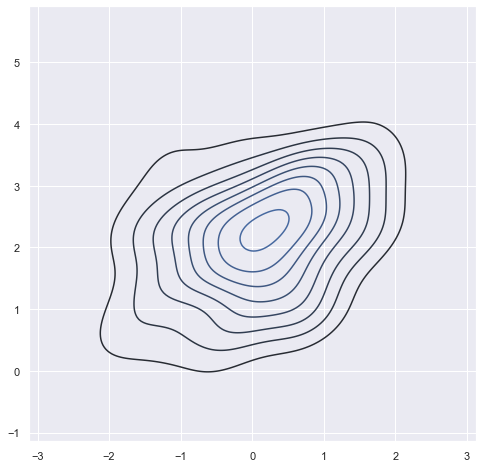

In [55]:
import numpy as np; np.random.seed(42)
import seaborn as sns
sns.set(color_codes=True)

n = 100
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=n).T

print(x.shape)
print(y.shape)
fig = plt.figure(figsize=(8,8))
ax = sns.kdeplot(x, y,gridsize=200)

# Mean-shift clustering

In [138]:
# Compute clustering with MeanShift
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(cancer_features, quantile=0.8)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# ms.fit(cancer_features[['mean radius', 'mean smoothness']])
ms.fit(cancer_features)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('Number of estimated clusters: {0} Bandwith: {1}'.format(n_clusters_, bandwidth))

Number of estimated clusters: 2 Bandwith: 999.6348035605397


In [139]:
# Add the centers to a dataframe
centers_df = pd.DataFrame(cluster_centers)

# centers_df.columns = ['x', 'y']

centers_df['x'] = centers_df[0]
centers_df['y'] = centers_df[4]

centers_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,x,y
0,13.030204,18.834351,84.397278,540.00268,0.095368,0.095169,0.070178,0.038213,0.179118,0.063189,...,96.34068,687.032577,0.130849,0.232159,0.235097,0.098799,0.285677,0.083395,13.030204,0.095368
1,27.420000,26.270000,186.900000,2501.00000,0.108400,0.198800,0.363500,0.168900,0.206100,0.056230,...,251.20000,4254.000000,0.135700,0.425600,0.683300,0.262500,0.264100,0.074270,27.420000,0.108400


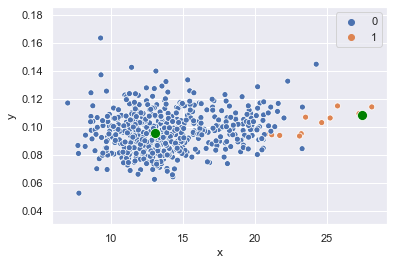

In [140]:
# Plot clusters in two dimensions and overlay the centers
sns.scatterplot(x='mean radius', y='mean smoothness', data=cancer_features, hue=labels)
sns.scatterplot(x='x', y='y', data=centers_df, color='green', s=100)

# Hierarchical clustering

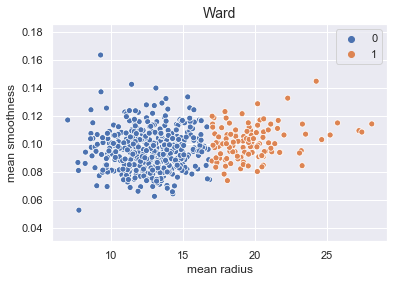

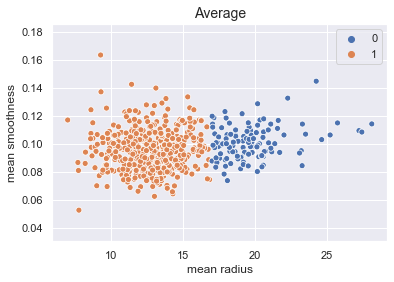

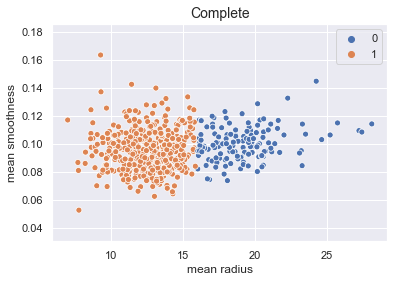

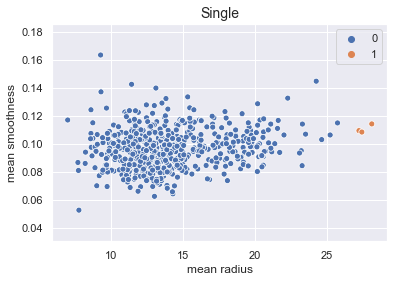

<Figure size 432x288 with 0 Axes>

In [198]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

linkage_type = ['ward', 'average', 'complete', 'single']
for linkage in linkage_type:

    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    clustering.fit(cancer_features[['mean radius', 'mean smoothness']])

    ax = sns.scatterplot(x='mean radius', y='mean smoothness', data=cancer_features, hue=clustering.labels_)
    ax.set_title(linkage.title(),fontsize=14)
    plt.figure();

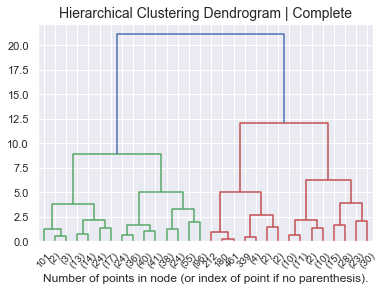

In [204]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree
linkage = linkage_type[2]
clustering = AgglomerativeClustering(linkage=linkage, distance_threshold=0, n_clusters=None)
model = clustering.fit(cancer_features[['mean radius', 'mean smoothness']])

# plot dendogram
plt.title('Hierarchical Clustering Dendrogram | {0}'.format(linkage.title()), fontsize=14)
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()